In [1]:
#\-- IMPORT MODULES, CLASSES AND METHODS --/#

import zipfile                          #############################
import os                               # || FILE SYSTEM / UTILS || #
import copy                             #############################
from prettytable import PrettyTable
import copy

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
from sklearn.ensemble import IsolationForest
import numpy as np                  ###################################
import pandas as pd                 # || EXPLORATIVE DATA ANALYSIS || #
import matplotlib.pyplot as plt     ###################################
import seaborn as sns
import matplotlib
# https://towardsdatascience.com/handling-missing-data-like-a-pro-part-3-model-based-multiple-imputation-methods-bdfe85f93087 NumPyro, impyute,

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

import sklearn
import re
import importlib
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

from sklearn import naive_bayes                         #########################
from sklearn import neural_network                      #  |-----------------|  #
from sklearn import svm                                 # || MODEL SELECTION || #
from sklearn import tree                                #  |-----------------|  #
from sklearn import linear_model                        #########################

# from PrunedCV import PrunedCV

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.model_selection import StratifiedKFold     ##########################
from sklearn.model_selection import ParameterGrid       # || MODEL VALIDATION || #
                                                        ##########################
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline


from bs4 import BeautifulSoup
import requests
from selenium import webdriver
import re
from datetime import datetime, timedelta

In [2]:
#\-- SET ENVIRONMENT --/#
# Before starting we need to store the data properly. We define an ad-hoc folder where we will store everything.
main_PATH = os.getcwd()

# We check whether we already have the data.                        
if 'data' not in os.listdir():                                      
                                                                    
    # Unzip files.
    with zipfile.ZipFile(r'summer_project_dataset.zip') as zip_ref:

        os.mkdir(main_PATH + '/data')   # We create the 'data' directory,
        os.chdir(main_PATH + '/data')   # we change directory,
    
        data_PATH = os.getcwd()         # we get the data path
        zip_ref.extractall(data_PATH)   # and we unzip there.       #####################
                                                                    # || FILE SYSTEM || #    
    file_PATH = data_PATH + '/summer_project_dataset'               #####################

else:

    # We just build the paths.
    data_PATH = main_PATH + '/data'
    file_PATH = data_PATH + '/summer_project_dataset'

# Finally, we go back to our main path.
os.chdir(main_PATH)

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# We also set a seed for reproducibility purposes.      #####################
SEED = 42                                               # || RANDOM SEED || #
np.random.seed(SEED)                                    #####################

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# LaTeX style plots.
plt.rcParams['figure.figsize'] = (12, 8)
# plt.rcParams['text.usetex']    = True         ############################
# plt.rcParams['font.family']    = 'serif'      # || DEFAULT PARAMETERS || #
# plt.rcParams['font.size']      = '10'         ############################

pd.set_option('display.max_rows', 20)
# pd.set_option('display.max_rows', 10)

In [3]:
#\-- DATASET LOADING AND PREPROCESSING --/#
# Aome variables are stored as float, but they are actually int. Two reasons why:
#       -) nan values are considered as float --> first estimate them and then change the data type.
#       -) there are inconsistencies, especially in kw_max_min where some int values are float instead.
# for the moment just let's store everything as float, but further inspections are needed.

data_types = {
              'url' : str, 'timedelta' : int, 'shares' : int, 'data_channel' : str, 'weekday' : str, 
              
              'n_tokens_title'          : int, 'n_tokens_content'       : int, 'n_unique_tokens' : float, 'n_non_stop_words' : float,
              'n_non_stop_unique_tokens': float, 'average_token_length' : float,

              'num_hrefs' : int, 'num_self_hrefs' : int, 'num_imgs' : float, 'num_videos' : float,
              
              'kw_min_min' : float, 'kw_max_min' : float, 'kw_avg_min' : float, 'kw_min_max' : float, 'kw_max_max'   : float,
              'kw_avg_max' : float, 'kw_min_avg' : float, 'kw_max_avg' : float, 'kw_avg_avg' : float, 'num_keywords' : float,
              
              'self_reference_min_shares' : float, 'self_reference_max_shares' : float, 'self_reference_avg_sharess' : float,
              
              'LDA_00' : float, 'LDA_01' : float, 'LDA_02' : float, 'LDA_03' : float, 'LDA_04' : float,
              
              'global_subjectivity' : float, 'global_sentiment_polarity' : float, 'global_rate_positive_words' : float, 'global_rate_negative_words' : float,
              
              'rate_positive_words' : float, 'rate_negative_words' : float,
              
              'avg_positive_polarity' : float, 'min_positive_polarity' : float, 'max_positive_polarity' : float, 'avg_negative_polarity' : float,
              'min_negative_polarity' : float, 'max_negative_polarity' : float,

              'title_subjectivity' : float, 'title_sentiment_polarity' : float, 'abs_title_subjectivity' : float, 'abs_title_sentiment_polarity' : float,
              }                                                    
                                                                   
                                                                   
df = pd.read_csv(file_PATH + r'/development.csv',                 
                   usecols = lambda column: column != 'id', dtype = data_types)              
df


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday
0,http://mashable.com/2014/09/08/safest-cabbies-...,121,12,1015,0.422018,1.0,0.545031,10,6,33.0,...,-0.160714,-0.500000,-0.071429,0.000000,0.000,0.500000,0.000,2900,bus,tuesday
1,http://mashable.com/2013/07/25/3d-printed-rifle/,532,9,503,0.569697,1.0,0.737542,9,0,NaN,...,-0.157500,-0.250000,-0.100000,0.000000,0.000,0.500000,0.000,1300,tech,thursday
2,http://mashable.com/2013/10/30/digital-dinosau...,435,9,232,0.646018,1.0,0.748428,12,3,4.0,...,-0.427500,-1.000000,-0.187500,0.000000,0.000,0.500000,0.000,17700,lifestyle,wednesday
3,http://mashable.com/2014/08/27/homer-simpson-i...,134,12,171,0.722892,1.0,0.867925,9,5,0.0,...,-0.216667,-0.250000,-0.166667,0.400000,-0.250,0.100000,0.250,1500,bus,wednesday
4,http://mashable.com/2013/01/10/creepy-robotic-...,728,11,286,0.652632,1.0,0.800000,5,2,NaN,...,-0.251786,-0.500000,-0.100000,0.200000,-0.100,0.300000,0.100,1400,tech,thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31710,http://mashable.com/2014/11/30/star-wars-guard...,37,11,440,0.564103,1.0,0.718978,10,2,NaN,...,-0.209167,-0.316667,-0.050000,0.000000,0.000,0.500000,0.000,1000,world,tuesday
31711,http://mashable.com/2014/11/14/uk-floods/,52,14,0,0.000000,0.0,0.000000,0,0,0.0,...,0.000000,0.000000,0.000000,0.666667,-0.700,0.166667,0.700,11000,lifestyle,monday
31712,http://mashable.com/2014/09/08/paypal-bitcoin-...,121,9,969,0.489583,1.0,0.710623,6,5,2.0,...,-0.400000,-1.000000,-0.050000,0.000000,0.000,0.500000,0.000,2400,tech,tuesday
31713,http://mashable.com/2013/08/23/mashable-androi...,503,11,1976,0.412308,1.0,0.621080,21,3,1.0,...,-0.323413,-1.000000,-0.050000,0.700000,-0.400,0.200000,0.400,6000,lifestyle,friday



# Before isolation forest
* Discard n_tokens_content = 0.
* Discard -1 values.
* Discard all 0 values for kw_avg_min, kw_avg_avg, kw_avg_max --> keyword_behaviour.
* Drop kw_max_max, kw_max_min, kw_min_min, kw_max_max, kw_max_avg, kw_min_avg
* Drop n_non_stop_words, n_non_stop_unique_tokens (, n_tokens_content?).
* Drop self_reference_min_shares, self_reference_max_shares.
* Drop rate_positive_words, rate_negative_words.
* Drop abs_title_subjectivity, abs_title_sentiment_polarity.
* Drop URL.
* Fill imgs, videos, keywords.
* Encode weekdays into Weekend and Not Weekend.
* Make linear combination between avg, min, max positive/negative polarity (weighted average: 0.6, 0.2, 0.2 / 0.7, 0.15, 0.15).
* Make a combination between title_subjectivity, title_sentiment_polarity (title_subjectivity * title_sentiment_polarity)
* Make a combination between global_subjectivity, global_sentiment_polarity (global_subjectivity * global_sentiment_polarity)
* Find a way to combine the previous statistic (keyword_behaiour) with num_keywords.
* Try with/without timedelta.

# Apply isolation forest
* Give scores to samples and discard outliers over a certain threshold.

# After isolation forest
* Apply logarithm IF NECESSARY (analyze residuals and check whether a logarithm may be useful).

# Models
* Negative Binomial
* Log-normal
* Log and then simple regression
* Gamma


In [4]:
df['popular'] = np.where(df['shares'] > 20000, 1, 0)

In [5]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42, stratify = df['popular'])

In [6]:
from preprocessor import Preprocessing

pre = Preprocessing(df_train)

In [7]:
discard_zeros = ['n_tokens_content']

for feature in discard_zeros:

    _ = pre.discard_zeros(feature)



discard_negative = ['kw_avg_min', 'kw_avg_avg', 'kw_avg_max']

for feature in discard_negative:

    _ = pre.discard_negatives(feature, include_zeros = False)



# drop_columns = ['n_non_stop_words', 'n_non_stop_unique_tokens', 'self_reference_min_shares', 'self_reference_max_shares', 'rate_positive_words',
#                 'rate_negative_words', 'abs_title_subjectivity', 'abs_title_sentiment_polarity', 'url']

# _ = pre.drop(drop_columns)



# drop_kw = ['kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max', 'kw_min_avg', 'kw_max_avg']

# _ = pre.drop(drop_kw)



# drop_tokens = ['n_tokens_content']
# _ = pre.drop(drop_tokens)



# drop_rate = ['rate_positive_words', 'rate_negative_words']


# _ = pre.drop(drop_rate)


img_mean, videos_mean, key_mean = pre.fill_nan(columns = ['num_imgs', 'num_videos', 'num_keywords'], train = True)
# pre.fill_nan(imgs_mean = img_mean, videos_mean = videos_mean, key_mean = key_mean, columns = ['num_imgs', 'num_videos', 'num_keywords'], train = False)



_ = pre.encode_weekdays()




# weights_positive_polarity = {
#     'min_positive_polarity' : 0.2,
#     'avg_positive_polarity' : 0.6,
#     'max_positive_polarity' : 0.2
# }

# weights_negative_polarity  = {
#     'min_negative_polarity' : 0.2,
#     'avg_negative_polarity' : 0.6,
#     'max_negative_polarity' : 0.2
# }


# _ = pre.make_combination(weights_positive_polarity, 'positive_polarity', drop = True)
# _ = pre.make_combination(weights_negative_polarity, 'negative_polarity', drop = True)




# weights = {
#     'kw_avg_min' : 0.2,
#     'kw_avg_avg' : 0.3,
#     'kw_avg_max' : 0.5
# }

# _ = pre.make_combination(weights, name_combination = 'keyword_behaviour', drop = True)



_ = pre.apply_one_hot(column = 'data_channel')
_ = pre.apply_one_hot(column = 'weekday')



# drop_columns = ['Not Weekend', 'LDA_02', 'LDA_00', 'LDA_04', 'LDA_01', 'LDA_03']
# _ = pre.drop(drop_columns)


In [137]:
df = pre.get_dataframe()
# scores = pre.isolate()
# filtered_df_train = df[scores < 0.50]

In [134]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators = 5000, max_depth = 5)
regr.fit(df.drop(['shares', 'url', 'popular'], axis = 1), np.log(df['shares']))

RandomForestRegressor(max_depth=5, n_estimators=5000)

In [139]:
pred = regr.predict(df.drop(['shares', 'url', 'popular'], axis = 1))

In [142]:
pred

array([7.0182825 , 7.65916722, 7.2487448 , ..., 8.16707811, 7.17432138,
       7.22093095])

In [140]:
np.sqrt(mean_squared_error(np.exp(pred), df['shares']))

13277.822740578467

In [102]:

sorted_lists = sorted(zip(regr.feature_importances_, regr.feature_names_in_))

sorted_list1 = [x[1] for x in sorted_lists]
sorted_list2 = [x[0] for x in sorted_lists]


# Most important features
* kw_avg_avg
* self_reference_avg_sharess
* kw_max_avg
* timedelta
* tech
* entertainment
* self_reference_min_shares
* num_hrefs
* kw_avg_max
* socmed
* kw_min_max
* n_tokens_content
* LDA_04
* LDA_02
* n_unique_tokens
* n_non_stop_unique_tokens
* global_subjectivity
* glo

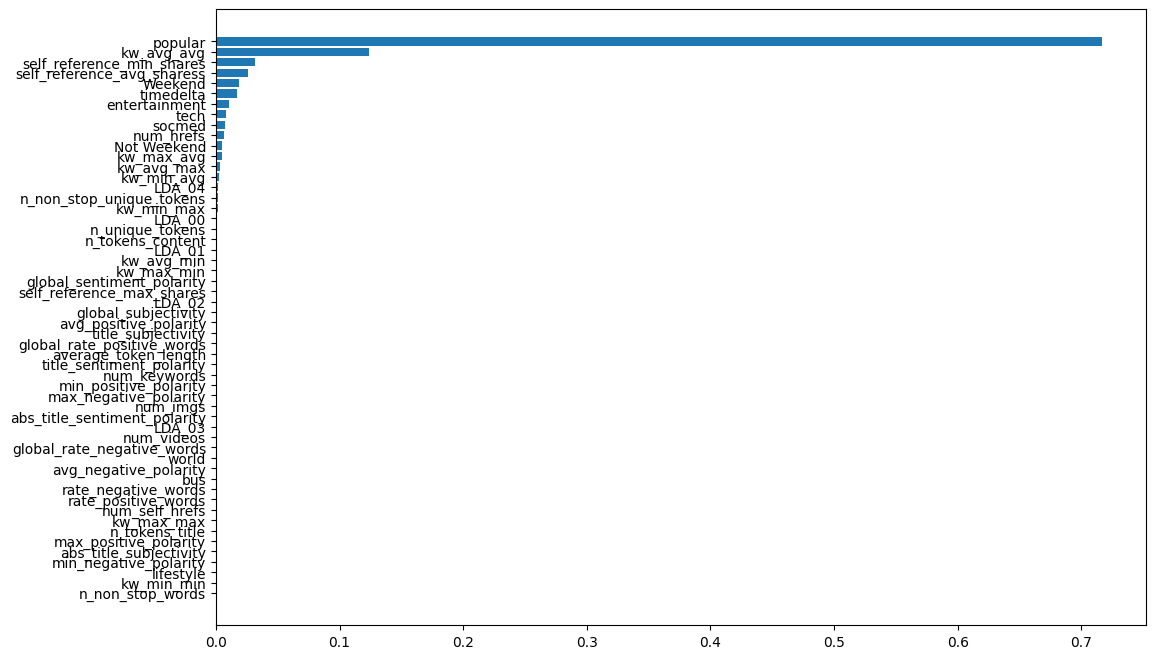

In [103]:
_ = plt.barh(y = sorted_list1, width = sorted_list2)

In [10]:
df = pre.get_dataframe()
filtered_df_test = copy.deepcopy(df)

In [13]:
filtered_df_test.shape, filtered_df_train.shape

((6010, 25), (23738, 25))

In [12]:
X_train = filtered_df_train.drop('shares', axis = 1)
y_train = filtered_df_train['shares']
X_test = filtered_df_test.drop('shares', axis = 1)
y_test = filtered_df_test['shares']

In [15]:
from sklearn.model_selection import KFold
from Pruned import PrunedCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import xgboost as xgb

#\-- A BIT OF TUNING AND THEN SELECTION --/#

# We first define the grid of parameters. We need to specify both the values AND the name of the classifier because it will be of use
# when picking the right ones.
# param_grid = {

#     'sklearn.ensemble.GradientBoostingRegressor': {                            # Here we specify only the SVM, but there should be a lot of other configurations.
#                 'learning_rate': [0.05, 0.1, 0.15],
#                 'n_estimator': [100, 300, 500, 1000, 2000],
#                 'min_samples_leaf' : [5, 15, 20],
#                 'min_weight_fraction_leaf' : [0.0, 0.1, 0.2],
#                 'max_depth' : [2, 3, 4, 5],
#                 'subsample' : [0.5, 0.75, 1.0],
#                 'min_samples_split' : [2, 5, 10, 20],
#                 'max_features' : ['auto', 'sqrt', 'log2']           
#                }                                     
             
#              }

param_grid = {

    'sklearn.ensemble.RandomForestRegressor': {      
        
        'n_estimators'    : [500, 1000, 1500],
        'max_depth'    : [5, 6, 7],
        'min_samples_split'     : [10, 50, 100],
        'min_samples_leaf'         : [10, 50, 100]
               },
    
                                      
             
             }

scores      = [mean_squared_error] # List of scores we want to compute, e.g. accuracy_score, f1_score, ... They must be methods.
THRESH_SKIP = 2
THRESH_PERCENTAGE = 0.95
MAIN_SCORE = 'mean_squared_error'

# Create a StratifiedKFold object for Cross Validation and perform the train/test split.
skf = KFold(n_splits = 5, shuffle = True, random_state = SEED)


# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# Start the Cross Validation. In this first step we simply try some configurations and try to tune the models the best we can.
# Notice that this phase should take not much time, but given the amount of possible configurations it is likely to be quite expensive.
# However, we are sure that at the end we will get a fair comparison between every model. 
# This will be called Cross-VSV (Validation-Selection-Validation) or Cross-SeleDation (Selection-Validation).


In [16]:
# p = PCA()
# temp = copy.deepcopy(X_train)
# p.fit(temp)

cross_validator = PrunedCV(X_train, y_train, skf)


cross_validator.set_params(param_grid, scores)
cross_validator.set_evaluation(mean_squared_error, 2, 1.20)
toc = time.time()
cross_validator.do_cross_validation(verbose = 4)


# At the end we will have a fair comparison between models. We can store additional information regarding the Standard Deviation as well.

# Consider using PrettyTable() to visualize the results.
# t = PrettyTable()
# t.field_names = ['Model', 'Accuracy', 'F1']
# t.add_row([name, accuracy, f1])

# print(t)

tic = time.time()
print(tic - toc)
# CONSIDER TO PRUNE THE SEARCH IF THE RESULTS DON'T IMPROVE MUCH.
# Example: if the best result with one model is 0.95 and another configuration of the same model is stuck near 0.90, just don't
# wait for the end of the loop but go to the next model/configuration.


Model: sklearn.ensemble.RandomForestRegressor


	NEW CONFIGURATION

Configuration: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 500}

Fold 1 / 5 - Skip: 0 / 2
Results: {'mean_squared_error': 11974.884989203094}
Highest average mean_squared_error: 20000
Fold 2 / 5 - Skip: 0 / 2
Results: {'mean_squared_error': 6919.8586608178575}
Highest average mean_squared_error: 20000
Fold 3 / 5 - Skip: 0 / 2
Results: {'mean_squared_error': 7746.580875529218}
Highest average mean_squared_error: 20000
Fold 4 / 5 - Skip: 0 / 2
Results: {'mean_squared_error': 14375.221102657499}
Highest average mean_squared_error: 20000
Fold 5 / 5 - Skip: 0 / 2
Results: {'mean_squared_error': 11233.361585599658}
Highest average mean_squared_error: 20000

	NEW CONFIGURATION

Configuration: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 1000}

Fold 1 / 5 - Skip: 0 / 2
Results: {'mean_squared_error': 11976.26778332579}
Highest average mean_squared_error

KeyboardInterrupt: 